# Les énigmes quantiques 002 - Les quatre chevelures

**<u>Problème:</u>**  
Alice, Bob, Charlie et Dalia sont placé en ligne, leurs cheveux sont était alétoirement en orange ou en indigo.  
Chacun peut voir la couleur de cheveux des gens devant lui mais pas la sienne.  
Le défi? Chaque personne doit deviner sa propre couleur de chevelure.  
L'équipe devra travailler ensemble pour trouver la bonne stratégie afin de déterminer la couleur orange ou indigo de toutes les chevelures.

**<u>Solution:</u>**  
Ils se mettent d'accord, si Alice voit un nombre pair de chevelure indigo elle dit orange, sinon indigo.  
Elle a ainsi bon 50% du temps et donne une information au autre participant.  
Chaque personne suivante pourra donc déduire sa couleur de cheveux en fonction des réponses précédentes.  
Nous avons donc toujours au moins 3 bonnes réponses sur 4, et 50% du temps 4/4.

Une [vidéo](https://www.youtube.com/watch?v=xUE09alZPfg&list=PLtn704u3JW-K4q9YkQWTfWRxaq-9oLfJ3&index=5) explicative peut être trouvé sur la chaine Youtube de l'Institut quantique de l'Université de Sherbrooke 

## Import

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *

## Création du circuit
- 4 qbit pour les participant
- 4 qbit pour les raisonnements de chaque participants

In [2]:
circ = QuantumCircuit(8)

On place une porte Hadamard sur les 4 premiers qbit pour faire cohabiter tous les combinaisons possible de teintures

In [3]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.barrier()

Alice utilise des portes cnot pour calculer le nombre de chevelure indigo devant elle.  
Le calcul est consigné dans le qbit n°4

In [4]:
circ.cx(4, 1)
circ.cx(4, 2)
circ.cx(4, 3)
circ.barrier()

Bob, Charlie et Dalia entendent la réponse d'Alice et enregistre le résulat dans leurs qbit de raisonnement

In [5]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)
circ.barrier()

Bob utilise a son tour les porte cnot pour voir les chevelure devant lui, et en deduis la sienne.  

In [6]:
circ.cx(2, 5)
circ.cx(3, 5)
circ.barrier()

Charlie et Dalia prennent note sa réponse

In [7]:
circ.cx(5, 6)
circ.cx(5, 7)
circ.barrier()

Charlie note la couleur de la chevelure devant lui, et l'annonce

In [8]:
circ.cx(3, 6)
circ.barrier()

Dalia note la réponse et annonce la couleur

In [9]:
circ.cx(6, 7)

## Vizualisation du circuit

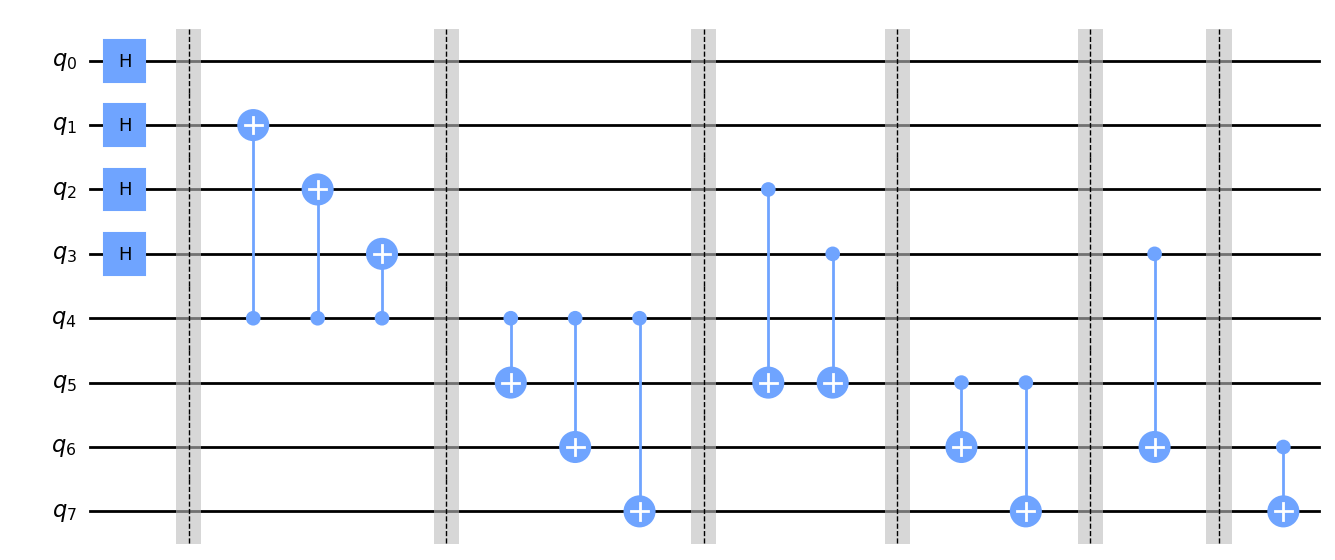

In [10]:
circ.draw("mpl", style="clifford")

## State Vector

In [11]:
statevector_backend = Aer.get_backend('statevector_simulator') 
statevector_job = statevector_backend.run(circ)
statevector_result = statevector_job.result()
statevector_outputstate = statevector_result.get_statevector(circ, decimals = 8)
statevector_counts = statevector_result.get_counts()

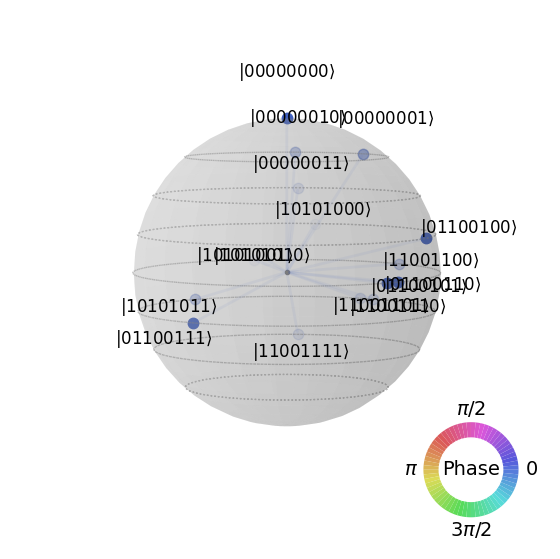

In [12]:
plot_state_qsphere(statevector_outputstate)

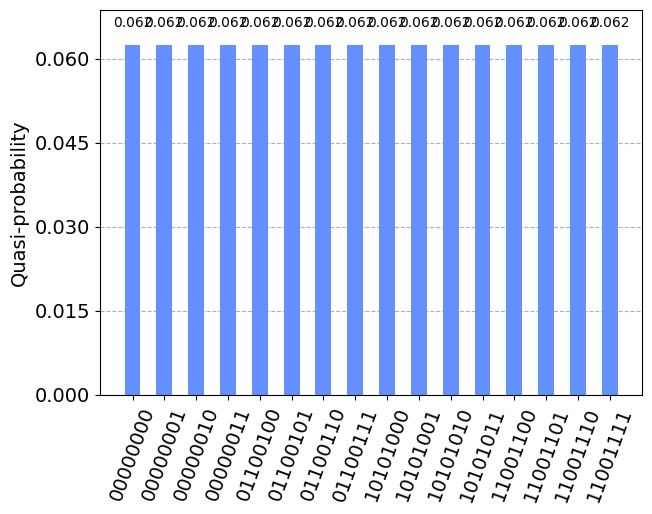

In [13]:
plot_histogram(statevector_counts)


On observe que la probabilités de des 16 sorties sont égale (6.2%)

## Simulation

In [14]:
circ.measure_all()
simulator: AerSimulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ, shots=100_000).result()
counts = result.get_counts(circ)

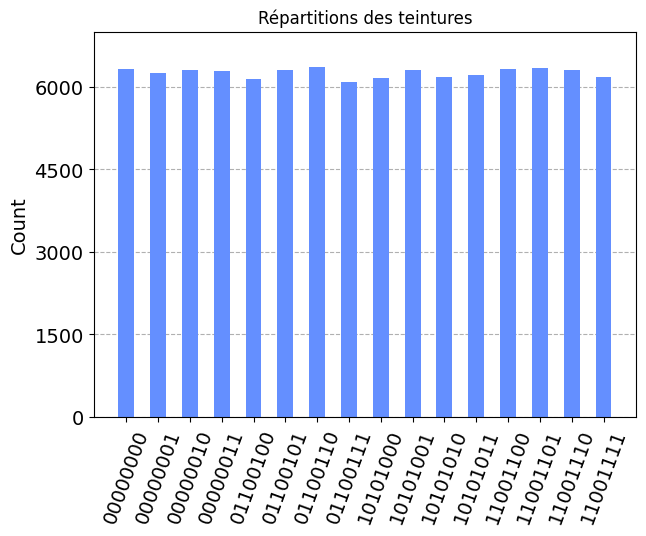

In [15]:
plot_histogram(counts, title='Répartitions des teintures', bar_labels=False)

On peut observer que après 100 000 simulations, la distribution entre les seize posibilités tend à être uniforme